In [37]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [38]:
xy = np.loadtxt('diabetes.csv.gz', delimiter = ',', dtype = np.float32)

In [39]:
xy.shape

(759, 9)

In [40]:
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, [-1]])

In [41]:
x_data.shape, y_data.shape

(torch.Size([759, 8]), torch.Size([759, 1]))

In [51]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(8, 6)
        self.linear2 = nn.Linear(6, 4)
        self.linear3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()

In [52]:
model

Model(
  (linear1): Linear(in_features=8, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [53]:
# 损失函数
criterion = torch.nn.BCELoss(size_average = True)
# 优化器 
optimizer =  torch.optim.SGD(model.parameters(), lr = 0.3)

epoch_list = []
loss_list = []
#loss_list_1 = []
for epoch in range(2000):
    y_pred = model(x_data)
    #y_pred_1 = model_1(x_data)
    loss = criterion(y_pred, y_data)
    #loss_1 = criterion(y_pred_1, y_data)
    epoch_list.append(epoch)
    loss_list.append(loss)
    #loss_list_1.append(loss_1)
    print('Epoch = ', epoch, 'Loss = ', loss.item())

    #print('Epoch = ', epoch, 'Loss_1 = ', loss_1.item())

    optimizer.zero_grad()
    loss.backward()
    #loss_1.backward()
    optimizer.step()

Epoch =  0 Loss =  0.6457865238189697
Epoch =  1 Loss =  0.6457021236419678
Epoch =  2 Loss =  0.6456379890441895
Epoch =  3 Loss =  0.645589292049408
Epoch =  4 Loss =  0.6455520391464233
Epoch =  5 Loss =  0.6455235481262207
Epoch =  6 Loss =  0.6455017924308777
Epoch =  7 Loss =  0.6454849243164062
Epoch =  8 Loss =  0.6454718708992004
Epoch =  9 Loss =  0.6454616785049438
Epoch =  10 Loss =  0.6454536318778992
Epoch =  11 Loss =  0.6454470753669739
Epoch =  12 Loss =  0.6454418897628784
Epoch =  13 Loss =  0.6454377174377441
Epoch =  14 Loss =  0.6454341411590576
Epoch =  15 Loss =  0.6454311609268188
Epoch =  16 Loss =  0.6454284191131592
Epoch =  17 Loss =  0.6454261541366577
Epoch =  18 Loss =  0.6454240679740906
Epoch =  19 Loss =  0.6454221606254578
Epoch =  20 Loss =  0.6454203724861145
Epoch =  21 Loss =  0.6454187035560608
Epoch =  22 Loss =  0.6454170942306519
Epoch =  23 Loss =  0.6454155445098877
Epoch =  24 Loss =  0.6454140543937683
Epoch =  25 Loss =  0.64541262388229

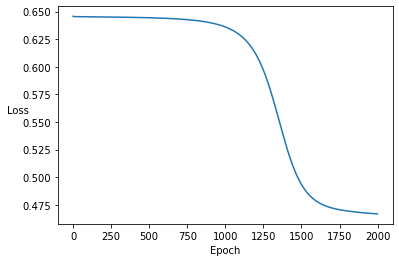

In [54]:
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.show()